<a href="https://colab.research.google.com/github/athp18/cv-workshop/blob/main/DataTeach_CV_Workshop_10_30_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision

## Goal of this notebook

We want to learn some of the basics computer visio, building up from basic image processing to running inference with a deep learning model! We'll start off with some basic operations using OpenCV and build up to running a deep learning model.

## A few basic libraries:

- **PyTorch**: A Python library that offers support for creating deep learning models
- **OpenCV**: A computer vision library that offers support for a wide range of image processing algorithms
- **NumPy**: A library for efficient linear algebra and computation
- **PIL (Python Imaging Library)**: A library for image processing (used by PyTorch)
- **os**: A library for basic operating system commands
- **Matplotlib**: A library for displaying and plotting

Before we get started, let's download a few images and datasets to make things easier for ourselves.

In [ ]:
!wget "https://www.dropbox.com/scl/fi/rxkkl5ypkulvk8u1s2rm0/imgs.zip?rlkey=c84rxn3xw84livtdw1rxay66q&st=l5frpa9h&dl=1" -O images.zip
!unzip images.zip -x "__MACOSX/*" "*.DS_Store"

Also make sure that you're connected to a GPU Runtime (you can switch in the top right).

Let's also mount our Google Drive to this notebook. Any time you disconnect from Colab, any files created get deleted, so this is a good way to keep a copy.

In [ ]:
from google.colab.drive import mount

mount('/content/drive')

### Basic Matrices

- The foundation of machine learning and computer vision is a **matrix**.

![Image of Matrix](https://dcvp84mxptlac.cloudfront.net/diagrams2/equation-1-example-of-a-matrix.png)

A matrix is just a way to organize numbers. For example, mathematically, say we have two equations: x + y = 12 and 2x + 3y = 26. We can organize the coefficients and constants as a 2x3 matrix, like this:

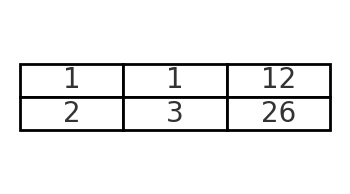

An image too can be represented as a matrix. A few examples to show this below:



The matrix above can be represented in Python in several ways:

```
- numpy.array([1,1,12],[2,3,26])
- torch.tensor([1,1,12], [2,3,26])
- [[1,1,12], [2,3,26]]
```
The first is a Numpy array (or the foundation for OpenCV, which we'll get to soon). The second is a PyTorch tensor (the foundation for PyTorch), which have been optimized for GPU operations. And the third is a regular Python list -- what you'll probably use out of most data science contexts :)

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./images/panda.jpg')
image_raw = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray)
plt.axis('off')
plt.show()

In [ ]:
print(image_gray)

In [ ]:
print(image_raw[:3]) # truncate so we don't show everything

In [ ]:
print("Shape of the raw image", image_raw.shape)
print("Shape of the grayscale image", image_gray.shape)

What can we see from this? In a grayscale image, each entry of the matrix is represented by a single value indicating how "gray" the image is. In a regular, color image, each entry has 3 values, corresponding to red, green, and blue. Each value has a range from 0 to 255, corresponding to how much color is in the image.

# So! Let's do it ourselves!

(Make sure to run the hidden cell below or else it will throw you an error)

In [ ]:
#@title Helper Functions
# Function to add a subplot with relative size visualization
def add_subplot_with_relative_size(position, img, title):
    ax = fig.add_subplot(gs[position])

    # Create a background to show original image dimensions
    background = np.zeros((height, width, 3), dtype=np.uint8) + 240  # Light gray background

    # Calculate position to center the transformed image
    img_h, img_w = img.shape[:2]
    y_offset = (height - img_h) // 2
    x_offset = (width - img_w) // 2

    # Place the transformed image on the background
    if img_h <= height and img_w <= width:
        background[y_offset:y_offset+img_h, x_offset:x_offset+img_w] = img
    else:
        # For rotated image that might exceed bounds, crop it
        visible_h = min(img_h, height)
        visible_w = min(img_w, width)
        background = img[:visible_h, :visible_w]

    ax.imshow(background)
    ax.set_title(title)

    # Add dotted lines to show original dimensions
    ax.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=height-1, color='gray', linestyle=':', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
    ax.axvline(x=width-1, color='gray', linestyle=':', alpha=0.5)

In [ ]:
# Import statements

import cv2
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: Basic OpenCV commands

What we want to learn here are the basics of OpenCV image processing -- that is, image loading, image stitching, etc. We also want to see how images are represented in OpenCV.

In [ ]:
# Exercise 1: Loading and printing basic info about an image with OpenCV

image_path = './images/bear.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"Image shape: {img.shape}")
print(f"Data type: {img.__}") # what command should we use to find the data type?
print(f"Min value: {img.__()}, Max value: {img.__()}") # how can we find the minimum of an array?

# Now say we want to break an image and apart and stitch it together? How can we do so?
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]
restitched_image = np.stack((red_channel, green_channel, blue_channel), axis=2).astype(np.uint8)

In [ ]:
# Draw the plots
plt.figure(figsize=(20, 4))

# Original image
plt.subplot(151)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Red channel
plt.subplot(152)
plt.imshow(red_channel)
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(153)
plt.imshow(green_channel)
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(154)
plt.imshow(blue_channel)
plt.title('Blue Channel')
plt.axis('off')

# Restitched image
plt.subplot(155)
plt.imshow(restitched_image)
plt.title('Restitched Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Exercise 2: Basic Image Operations

What we want to learn here is how to apply basic image operations (resizing, cropping, rotating) using OpenCV

In [ ]:
image = cv2.imread('./images/fox.jpg') # Read the image

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width = image.shape[:2]

# 1. Resizing the Image
scale_percent = 50  # percent of original size
new_width = int(width * scale_percent / 100)
new_height = int(height * scale_percent / 100)
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

# 2. Cropping the Image
crop_size = min(200, height, width)  # Ensure crop size doesn't exceed image dimensions
center_y, center_x = height // 2, width // 2
half_crop = crop_size // 2

start_y = center_y - half_crop
start_x = center_x - half_crop
end_y = center_y + half_crop
end_x = center_x + half_crop

cropped_image = image[start_y:end_y, start_x:end_x]

# 3. Rotating the Image
# We want to rotate by 45 degrees
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Create figure
fig = plt.figure(figsize=(20, 5))
gs = plt.GridSpec(1, 4, figure=fig)
images = [
    (image, 'Original Image\n' + f'({width}x{height})'),
    (resized_image, f'Resized Image\n({new_width}x{new_height})'),
    (cropped_image, f'Cropped Image\n({crop_size}x{crop_size})'),
    (rotated_image, 'Rotated Image (45°)\n' + f'({width}x{height})')
]

for idx, (img, title) in enumerate(images):
    add_subplot_with_relative_size(idx, img, title)

plt.tight_layout()
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
dog_image = cv2.imread('./images/pup.jpg')
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)
coin_image = cv2.imread('./images/coins.jpg')
coin_image_rgb = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)

# Dog Image Processing Steps
# Step 1: Apply Gaussian Blur
dog_gaussian_blur = cv2.GaussianBlur(dog_image, (7, 7), 5)

# Step 2: Convert to Grayscale
dog_gray = cv2.cvtColor(dog_gaussian_blur, cv2.COLOR_RGB2GRAY)

# Step 3: Apply Canny Edge Detection
dog_edges = cv2.Canny(dog_gray, 100, 200)

# Step 4: Find and Draw Contours
dog_contours, _ = cv2.findContours(dog_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
dog_image_with_contours = dog_image.copy()
cv2.drawContours(dog_image_with_contours, dog_contours, -1, (255, 0, 0), 2)

In [ ]:
# Draw the plots
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(dog_image)
plt.title("Original Dog Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(dog_gaussian_blur)
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dog_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(dog_image_with_contours)
plt.title("Contours on Dog Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Coin Image Processing Steps
# Step 1: Create a black background mask for coins
coin_gray = cv2.cvtColor(coin_image, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(coin_gray, 240, 255, cv2.THRESH_BINARY_INV)
black_bg = coin_image_rgb.copy()
black_bg[binary_mask == 0] = [0, 0, 0]

# Step 2: Grayscale and Gaussian Blur for Contour Detection
gray_black_bg = cv2.cvtColor(black_bg, cv2.COLOR_RGB2GRAY)
coin_blurred = cv2.GaussianBlur(gray_black_bg, (9, 9), 2)

# Step 3: Find Contours
coin_contours, _ = cv2.findContours(coin_blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to reduce noise
min_contour_area = 1000
filtered_contours = [cnt for cnt in coin_contours if cv2.contourArea(cnt) > min_contour_area]
coin_count = len(filtered_contours)

# Draw Contours on Original and Black Background
coin_output_black = black_bg.copy()
coin_output_original = coin_image_rgb.copy()
for contour in filtered_contours:
    cv2.drawContours(coin_output_black, [contour], -1, (0, 255, 0), 2)
    cv2.drawContours(coin_output_original, [contour], -1, (0, 255, 0), 2)

In [ ]:
# Draw the plots
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(coin_image_rgb)
plt.title("Original Coin Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(black_bg)
plt.title("Black Background Mask")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(coin_output_black)
plt.title("Contours on Black Background")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(coin_output_original)
plt.title(f"Contours on Original Image: {coin_count} coins")
plt.axis('off')

plt.tight_layout()
plt.show()

# Now to implement our CartoonGAN!

CartoonGAN is based on a standard Generative Adversarial Network, but instead of just predicting between fake and real images, it also has to distinguish between smoothed cartoon images. As a result of this, CartoonGAN tends to avoid the problem that a lot of GANs trained on cartoons have, where images can appear overly smoothed.

Before we do anything, we need to download and unzip our datasets.

In [ ]:
!wget -O smoothed_cartoons.zip "https://www.dropbox.com/scl/fi/w2xpvrsqdhya1j1wunpoe/smoothed_cartoons.zip?rlkey=tr4vm7knz27kwfbax3di5z5fq&st=hgyfzlar&dl=1"
!wget -O cocoimg.zip "https://www.dropbox.com/scl/fi/oh0lsqhlf6kdbcrglhewf/coco_images.zip?rlkey=ltrlb1fnemfxhvixzcsnbbbaf&st=3vf59pp4&dl=1"
!wget -O cartoons.zip "https://www.dropbox.com/scl/fi/pcjnxskeju656k6kmkgtx/cartoons.zip?rlkey=iq2gpqy0q2dvpi8u3htfvyo97&st=byr3wr59&dl=1"

In [ ]:
!unzip cartoons.zip -d cartoons
!unzip smoothed_cartoons.zip -d smoothed_cartoons
!unzip cocoimg.zip -d cocoimgs -x "__MACOSX/*" "*.DS_Store"

In [ ]:
# Standard library imports
import os
import math
import time
import pickle
from datetime import datetime

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tqdm import tqdm

# PyTorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import AdamW
from torch.optim.lr_scheduler import CyclicLR
from torch.nn import BCELoss
from torch import sigmoid

# PyTorch vision imports
import torchvision.utils as vutils
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

In [ ]:
# Let's start by setting up a project directory
project_dir = './CartoonGANModel'
os.makedirs(project_dir, exist_ok=True)

In [ ]:
# Define basic parameters
image_size = 256  # Size to crop images to
batch_size = 16   # Number of images to process in parallel

# Define image transformations pipeline
transformer = transforms.Compose([
    transforms.CenterCrop(image_size),     # Crop the image to a square from the center
    transforms.ToTensor()                  # Convert PIL image to tensor and normalize from [0, 255] to [0.0, 1.0]
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print('Training on GPU')
else:
  print('Please connect to a GPU runtime')

In [ ]:
# Load and prepare cartoon dataset
cartoon_dataset = ImageFolder('cartoons/', transformer)
len_training_set = math.floor(len(cartoon_dataset) * 0.9)  # Use 90% for training
len_valid_set = len(cartoon_dataset) - len_training_set    # Remaining 10% for validation
training_set, _ = random_split(cartoon_dataset, (len_training_set, len_valid_set))
cartoon_image_dataloader_train = DataLoader(
    training_set,
    batch_size,
    shuffle=True,    # Shuffle data to prevent learning order-dependent patterns
    num_workers=0    # Single process data loading
)

# Load and prepare smoothed cartoon dataset
smoothed_cartoon_dataset = ImageFolder('smoothed_cartoons/', transformer)
len_training_set = math.floor(len(smoothed_cartoon_dataset) * 0.9)
len_valid_set = len(smoothed_cartoon_dataset) - len_training_set
training_set, _ = random_split(smoothed_cartoon_dataset, (len_training_set, len_valid_set))
smoothed_cartoon_image_dataloader_train = DataLoader(
    training_set,
    batch_size,
    shuffle=True,
    num_workers=0
)

# Load and prepare photo dataset (from COCO dataset)
photo_dataset = ImageFolder('cocoimgs/', transformer)
len_training_set = math.floor(len(photo_dataset) * 0.9)
len_valid_set = len(photo_dataset) - len_training_set
training_set, validation_set = random_split(photo_dataset, (len_training_set, len_valid_set))
# We want to split the dataset of real images into testing and training sets
photo_dataloader_train = DataLoader(
    training_set,
    batch_size,
    shuffle=True,
    num_workers=0
)
photo_dataloader_valid = DataLoader(
    validation_set,
    batch_size,
    shuffle=True,
    num_workers=0
)

In [ ]:
def show_sample_image(dataloader):
  iterator = iter(dataloader)
  sample_batch, _ = next(iterator)
  first_sample_image_of_batch = sample_batch[0]
  print(first_sample_image_of_batch.size())
  print("Current range: {} to {}".format(first_sample_image_of_batch.min(), first_sample_image_of_batch.max()))
  plt.imshow(np.transpose(first_sample_image_of_batch.numpy(), (1, 2, 0)))

show_sample_image(cartoon_image_dataloader_train)

In [ ]:
show_sample_image(smoothed_cartoon_image_dataloader_train)

In [ ]:
show_sample_image(photo_dataloader_train)

Now, let's set up our model architecture.

We use a pretrained VGG model to extract features from images, and our Generator uses a Residual Block to generate images.

In [ ]:
# Load VGG16 model
path_to_pretrained_vgg16 = os.path.join(project_dir, 'vgg_torch.pth')

try:
    # Load the state dictionary instead of the whole model
    vgg16 = models.vgg16(weights=None)  # weights=None for no pre-trained weights
    vgg16.load_state_dict(torch.load(path_to_pretrained_vgg16))
    vgg16 = vgg16.to(device)
except FileNotFoundError:
    # Download pretrained model and save its state dict
    vgg16 = models.vgg16(weights='IMAGENET1K_V1')  # Pretrained weights
    torch.save(vgg16.state_dict(), path_to_pretrained_vgg16)
    vgg16 = vgg16.to(device)

# Extract features up to conv4_3 (since conv4_4 doesn't exist in PyTorch VGG16)
feature_extractor = vgg16.features[:23]  # Layer 23 corresponds to conv4_3
for param in feature_extractor.parameters():
    param.requires_grad = False

In [ ]:
# Define the Residual Block
class ResidualBlock(nn.Module):
    def __init__(self):
        super(ResidualBlock, self).__init__()
        self.conv_1 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.norm_1 = nn.BatchNorm2d(256)
        self.norm_2 = nn.BatchNorm2d(256)

    def forward(self, x):
        output = self.norm_2(self.conv_2(F.relu(self.norm_1(self.conv_1(x)))))
        return output + x

# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.conv_1 = nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=3)
        self.norm_1 = nn.BatchNorm2d(64)

        # Down-convolution
        self.conv_2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.conv_3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.norm_2 = nn.BatchNorm2d(128)

        self.conv_4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.conv_5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.norm_3 = nn.BatchNorm2d(256)

        # Residual blocks
        residual_blocks = [ResidualBlock() for _ in range(8)]
        self.res = nn.Sequential(*residual_blocks)

        # Up-convolution
        self.conv_6 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_7 = nn.ConvTranspose2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.norm_4 = nn.BatchNorm2d(128)

        self.conv_8 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_9 = nn.ConvTranspose2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.norm_5 = nn.BatchNorm2d(64)

        self.conv_10 = nn.Conv2d(64, 3, kernel_size=7, stride=1, padding=3)

    def forward(self, x):
        x = F.relu(self.norm_1(self.conv_1(x)))

        x = F.relu(self.norm_2(self.conv_3(self.conv_2(x))))
        x = F.relu(self.norm_3(self.conv_5(self.conv_4(x))))

        x = self.res(x)

        x = F.relu(self.norm_4(self.conv_7(self.conv_6(x))))
        x = F.relu(self.norm_5(self.conv_9(self.conv_8(x))))

        x = self.conv_10(x)
        x = sigmoid(x)

        return x

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv_1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)

        self.conv_2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv_3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.norm_1 = nn.BatchNorm2d(128)

        self.conv_4 = nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1)
        self.conv_5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.norm_2 = nn.BatchNorm2d(256)

        self.conv_6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.norm_3 = nn.BatchNorm2d(256)

        self.conv_7 = nn.Conv2d(256, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = F.leaky_relu(self.conv_1(x), negative_slope=0.2)
        x = F.leaky_relu(self.norm_1(self.conv_3(F.leaky_relu(self.conv_2(x), negative_slope=0.2))), negative_slope=0.2)
        x = F.leaky_relu(self.norm_2(self.conv_5(F.leaky_relu(self.conv_4(x), negative_slope=0.2))), negative_slope=0.2)
        x = F.leaky_relu(self.norm_3(self.conv_6(x)), negative_slope=0.2)
        x = self.conv_7(x)
        x = sigmoid(x)
        return x

In [ ]:
# Initialize the models
G = Generator()
D = Discriminator()

G.to(device)
D.to(device)

In [ ]:
# Define the Discriminator Loss
class DiscriminatorLoss(nn.Module):
    def __init__(self):
        super(DiscriminatorLoss, self).__init__()
        self.bce_loss = BCELoss()

    def forward(self, discriminator_output_of_cartoon_input,
                discriminator_output_of_cartoon_smoothed_input,
                discriminator_output_of_generated_image_input):

        return self._adversarial_loss(discriminator_output_of_cartoon_input,
                                      discriminator_output_of_cartoon_smoothed_input,
                                      discriminator_output_of_generated_image_input)

    def _adversarial_loss(self, discriminator_output_of_cartoon_input,
                          discriminator_output_of_cartoon_smoothed_input,
                          discriminator_output_of_generated_image_input):

        # Use zeros and ones with the same shape as the discriminator outputs
        zeros = torch.zeros_like(discriminator_output_of_cartoon_input)
        ones = torch.ones_like(discriminator_output_of_cartoon_input)

        d_loss_cartoon = self.bce_loss(discriminator_output_of_cartoon_input, ones)
        d_loss_cartoon_smoothed = self.bce_loss(discriminator_output_of_cartoon_smoothed_input, zeros)
        d_loss_generated_input = self.bce_loss(discriminator_output_of_generated_image_input, zeros)

        d_loss = d_loss_cartoon + d_loss_cartoon_smoothed + d_loss_generated_input

        return d_loss

# Define the Generator Loss
class GeneratorLoss(nn.Module):
    def __init__(self, feature_extractor):
        super(GeneratorLoss, self).__init__()
        self.w = 0.000005
        self.bce_loss = BCELoss()
        self.feature_extractor = feature_extractor
        for param in self.feature_extractor.parameters():
            param.requires_grad = False

    def forward(self, discriminator_output_of_generated_image_input,
                generator_input,
                generator_output,
                is_init_phase=False):

        if is_init_phase:
            g_content_loss = self._content_loss(generator_input, generator_output)
            g_adversarial_loss = 0.0
            g_loss = g_content_loss
        else:
            g_adversarial_loss = self._adversarial_loss_generator_part_only(discriminator_output_of_generated_image_input)
            g_content_loss = self._content_loss(generator_input, generator_output)
            g_loss = g_adversarial_loss + self.w * g_content_loss

        return g_loss

    def _adversarial_loss_generator_part_only(self, discriminator_output_of_generated_image_input):
        ones = torch.ones_like(discriminator_output_of_generated_image_input)
        return self.bce_loss(discriminator_output_of_generated_image_input, ones)

    def _content_loss(self, generator_input, generator_output):
        # Compute the content loss between the VGG features of the input and output
        vgg_input_features = self.feature_extractor(generator_input)
        vgg_output_features = self.feature_extractor(generator_output)
        content_loss = F.l1_loss(vgg_output_features, vgg_input_features)
        return content_loss

# Initialize Loss functions
discriminatorLoss = DiscriminatorLoss()
generatorLoss = GeneratorLoss(feature_extractor)

In [ ]:
# Now, let's get ready for training!
# Set up optimizers
lr = 0.0002
beta1 = 0.5
beta2 = 0.999

d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(beta1, beta2))
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(beta1, beta2))

# Set up directories for saving results and checkpoints
os.makedirs(os.path.join(project_dir, 'checkpoints/'), exist_ok=True)
intermediate_results_training_path = os.path.join(project_dir, 'intermediate_results/training/')
os.makedirs(intermediate_results_training_path, exist_ok=True)

# Function to save training results
def save_training_result(input, output):
    # input/output has batch-size number of images, get first one and detach from tensor
    image_input = input[0].detach().cpu().numpy()
    image_output = output[0].detach().cpu().numpy()
    # Transpose image from torch.Size([3, 256, 256]) to (256, 256, 3)
    image_input = np.transpose(image_input, (1, 2, 0))
    image_output = np.transpose(image_output, (1, 2, 0))

    # Generate filenames as timestamp
    filename = str(int(time.time()))
    path_input = os.path.join(intermediate_results_training_path, filename + "_input.jpg")
    path_output = os.path.join(intermediate_results_training_path, filename + ".jpg")
    plt.imsave(path_input, image_input)
    plt.imsave(path_output, image_output)

# Check for existing checkpoints
checkpoint_dir = os.path.join(project_dir, 'checkpoints/')
checkpoints = os.listdir(checkpoint_dir)
num_epochs = 200 + 10  # Training + initialization phase
epochs_already_done = 0
best_valid_loss = math.inf
losses = []
validation_losses = []

if len(checkpoints) > 0:
    last_checkpoint = sorted(checkpoints)[-1]
    checkpoint = torch.load(os.path.join(checkpoint_dir, last_checkpoint), map_location=device)
    best_valid_loss = checkpoint['best_valid_loss']
    epochs_already_done = checkpoint['last_epoch']
    losses = checkpoint['losses']
    validation_losses = checkpoint['validation_losses']

    D.load_state_dict(checkpoint['d_state_dict'])
    G.load_state_dict(checkpoint['g_state_dict'])
    d_optimizer.load_state_dict(checkpoint['d_optimizer_state_dict'])
    g_optimizer.load_state_dict(checkpoint['g_optimizer_state_dict'])
    print('Loaded checkpoint {} with g_valid_loss {}, best_valid_loss {}, {} epochs and total no of losses {}'.format(
        last_checkpoint, checkpoint['g_valid_loss'], best_valid_loss, epochs_already_done, len(losses)))

Now, our training loop!

In [ ]:
# Define the training function
def train(num_epochs, checkpoint_dir, best_valid_loss, epochs_already_done, losses, validation_losses):
    init_epochs = 10
    print_every = 100
    start_time = time.time()

    # Training loop
    for epoch in tqdm(range(epochs_already_done, num_epochs), desc="Epochs"):
        D.train()
        G.train()
        is_init_phase = epoch < init_epochs

        # Training batches
        for index, ((photo_images, _), (smoothed_cartoon_images, _), (cartoon_images, _)) in enumerate(
                tqdm(zip(photo_dataloader_train, smoothed_cartoon_image_dataloader_train, cartoon_image_dataloader_train),
                     desc="Batches", leave=False)):

            batch_size = photo_images.size(0)
            photo_images = photo_images.to(device)
            smoothed_cartoon_images = smoothed_cartoon_images.to(device)
            cartoon_images = cartoon_images.to(device)

            # Train the discriminator
            d_optimizer.zero_grad()

            d_of_cartoon_input = D(cartoon_images)
            d_of_cartoon_smoothed_input = D(smoothed_cartoon_images)
            generated_images = G(photo_images)
            d_of_generated_image_input = D(generated_images.detach())

            d_loss = discriminatorLoss(d_of_cartoon_input,
                                       d_of_cartoon_smoothed_input,
                                       d_of_generated_image_input)

            d_loss.backward()
            d_optimizer.step()

            # Train the generator
            g_optimizer.zero_grad()

            generated_images = G(photo_images)
            d_of_generated_image_input = D(generated_images)

            g_loss = generatorLoss(d_of_generated_image_input,
                                   photo_images,
                                   generated_images,
                                   is_init_phase=is_init_phase)

            g_loss.backward()
            g_optimizer.step()

            if (index % print_every) == 0:
                losses.append((d_loss.item(), g_loss.item()))
                now = time.time()
                current_run_time = now - start_time
                start_time = now
                print("Epoch {}/{} | d_loss {:6.4f} | g_loss {:6.4f} | time {:2.0f}s | total no. of losses {}".format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item(), current_run_time, len(losses)))

        save_training_result(photo_images, generated_images)

        # Validation
        D.eval()
        G.eval()
        with torch.no_grad():
            total_g_valid_loss = 0.0
            num_batches = 0
            for batch_index, (photo_images, _) in enumerate(tqdm(photo_dataloader_valid, desc="Validation Batches", leave=False)):
                photo_images = photo_images.to(device)
                generated_images = G(photo_images)
                d_of_generated_image_input = D(generated_images)
                g_valid_loss = generatorLoss(d_of_generated_image_input,
                                             photo_images,
                                             generated_images,
                                             is_init_phase=is_init_phase)
                total_g_valid_loss += g_valid_loss.item()
                num_batches += 1

            avg_g_valid_loss = total_g_valid_loss / num_batches
            validation_losses.append(avg_g_valid_loss)
            print("Epoch {}/{} | validation loss {:6.4f}".format(epoch+1, num_epochs, avg_g_valid_loss))

        # Checkpointing
        if avg_g_valid_loss < best_valid_loss:
            print("Generator loss improved from {} to {}".format(best_valid_loss, avg_g_valid_loss))
            best_valid_loss = avg_g_valid_loss

        checkpoint = {'g_valid_loss': avg_g_valid_loss,
                      'best_valid_loss': best_valid_loss,
                      'losses': losses,
                      'validation_losses': validation_losses,
                      'last_epoch': epoch+1,
                      'd_state_dict': D.state_dict(),
                      'g_state_dict': G.state_dict(),
                      'd_optimizer_state_dict': d_optimizer.state_dict(),
                      'g_optimizer_state_dict': g_optimizer.state_dict()
                     }
        print("Save checkpoint for validation loss of {}".format(avg_g_valid_loss))
        torch.save(checkpoint, os.path.join(checkpoint_dir, 'checkpoint_epoch_{:03d}.pth'.format(epoch+1)))
        if best_valid_loss == avg_g_valid_loss:
            print("Overwrite best checkpoint")
            torch.save(checkpoint, os.path.join(checkpoint_dir, 'best_checkpoint.pth'))

    return losses, validation_losses

In [ ]:
losses, validation_losses = train(num_epochs, checkpoint_dir, best_valid_loss, epochs_already_done, losses, validation_losses)

# Now to run inference with our model!

Since we have limited time, you probably won't have a very well-trained model. For convenience, you can use a trained model here.

In [ ]:
"""
Download the pretrained model weights
"""
import gdown
import os
import zipfile

file_id = '1wcCs3Q7b6fhKqa1ET3oWGdE-CkO-Bd67'
direct_url = f'https://drive.google.com/uc?id={file_id}'
output = 'generator.zip'  # Use .zip extension
gdown.download(direct_url, output, quiet=False)

try:
    with zipfile.ZipFile('generator.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    print("File extracted successfully!")
    os.remove('generator.zip')
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [ ]:
checkpoint = torch.load('./generator_latest.pth', map_location=device, weights_only=True)

if checkpoint is not None:
    # Initialize your model and load the state dict
    G_inference = Generator()  # Make sure Generator is defined
    G_inference.load_state_dict(checkpoint['g_state_dict'])

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def cartoonize_and_display(image_path, model_path='./generator_latest.pth', device='cpu'):
    """
    Load an image, cartoonize it, and display both original and cartoonized versions side by side

    Args:
        image_path (str): Path to input image
        model_path (str): Path to pretrained generator weights
        device (str): 'cuda' or 'cpu'
    """
    # Load and prepare image
    transformer = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

    # Load and transform original image
    original_image = Image.open(image_path).convert('RGB')
    image_tensor = transformer(original_image).unsqueeze(0).to(device)

    # Load model
    checkpoint = torch.load(model_path, map_location=device)
    G = Generator()
    G.load_state_dict(checkpoint['g_state_dict'])
    G.to(device)
    G.eval()

    # Run inference
    # We "freeze" the model as it is so that PyTorch doesn't update the weights
    with torch.no_grad():
        output = G(image_tensor)

    # Convert output tensor to an image by moving it from our GPU to CPU and then converting it to a Numpy array
    cartoonized = output[0].cpu().detach().numpy()
    cartoonized = np.transpose(cartoonized, (1, 2, 0))
    cartoonized = np.clip(cartoonized, 0, 1)  # Ensure values are in [0,1]

    # Get the transformed original image for comparison
    original = image_tensor[0].cpu().detach().numpy()
    original = np.transpose(original, (1, 2, 0))

    # Create side by side plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cartoonized)
    plt.title('Cartoonized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
cartoonize_and_display(
    image_path='./images/cow.jpg'
)

# Now let's cartoonize images on our webcam!



In [ ]:
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
import io

def take_photo():
    """Take a photo using the webcam in Google Colab."""
    js_code = """
    async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        const video = document.createElement('video');
        const canvas = document.createElement('canvas');

        capture.textContent = 'Capture';
        div.appendChild(video);
        div.appendChild(capture);

        document.body.appendChild(div);

        // Get video stream
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Set up canvas
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;

        // Take photo when button clicked
        return new Promise((resolve) => {
            capture.onclick = () => {
                canvas.getContext('2d').drawImage(video, 0, 0);
                stream.getVideoTracks()[0].stop();
                div.remove();
                resolve(canvas.toDataURL('image/jpeg', 0.8));
            };
        });
    }
    takePhoto();
    """

    # Display JavaScript code and execute the function
    display(Javascript(js_code))
    photo_data = eval_js(js_code)
    binary = b64decode(photo_data.split(',')[1])
    return binary

def webcam_to_cartoon(model_path='./generator_latest.pth', device='cpu'):
    """
    Take a photo from webcam and cartoonize it

    Args:
        model_path (str): Path to pretrained generator weights
        device (str): 'cuda' or 'cpu'
    """
    print("Click 'Capture' to take a photo when your webcam opens")

    try:
        # Take photo
        image_binary = take_photo()

        # Save temporary file
        temp_filename = 'temp_webcam.jpg'
        with open(temp_filename, 'wb') as f:
            f.write(image_binary)

        # Cartoonize and display (implement your cartoonize_and_display function)
        cartoonized = cartoonize_and_display(temp_filename, model_path, device)

        # Clean up
        import os
        os.remove(temp_filename)

        return cartoonized

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Make sure you've allowed camera access in your browser.")

# Inform the user about camera access
HTML("""
<div class="alert alert-info">
    <h3>Important:</h3>
    <p>If this is your first time using the webcam in Colab, you'll need to allow camera access.</p>
    <p>Look for the camera permission popup in your browser.</p>
</div>
""")

# To use:
webcam_to_cartoon()